In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np

dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")




In [2]:
def append_data(row):
    data=row["moments"].copy()
    np.append(data,row["hue"])
    return data

In [3]:
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    samples.append(ut.label_properties(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
df_raw["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_raw)

    value seed label index                                            moments  \
0       3    B    3B    3B  [0.3146087169922259, 0.04648041113515295, 0.00...   
1       5    O     O     O  [0.15921960079761538, 1.754618425772516e-05, 1...   
2       7    C     C     C  [0.21478183722942212, 0.013068344117165552, 0....   
3       9    O     9     9  [0.24092615321393057, 0.014109585223938653, 0....   
4       A    B    AB    AB  [0.36973957727461076, 0.07997786069809651, 0.0...   
..    ...  ...   ...   ...                                                ...   
963     6    C     C     C  [0.23553560252525352, 0.02203307743738124, 0.0...   
964     9    S     9     9  [0.23522177416746126, 0.018668195138152918, 0....   
965     4    B     B     B  [0.30839368229027303, 0.06486624866846245, 0.0...   
966     3    C     C     C  [0.21139960283056386, 0.013294877767614243, 0....   
967     5    C     C     C  [0.22507072345055015, 0.01903724612206534, 0.0...   

           hue             

In [4]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      3    O     O  [0.15920113065156138, 1.0248073127061448e-05, ...   
1      9    S     9  [0.23288441967826315, 0.017458037649363357, 0....   
2      5    B     B  [0.33829843519922564, 0.08559508070571599, 0.0...   
3      7    S     7  [0.7297364897159949, 0.1525648437001917, 0.238...   
4      2    O     O  [0.15919269491009808, 9.464240247175968e-06, 1...   
5      4    O     4  [0.24751763821066408, 0.015234860457860518, 0....   
6      4    C     C  [0.21432958822404813, 0.014695304724111914, 0....   
7      R    O     R  [0.28239178295174394, 0.04662711389345385, 0.0...   
8      6    O     O  [0.15928261477650016, 7.6278538613511295e-06, ...   
9      7    O     O  [0.15926755835462658, 3.099662896011585e-06, 6...   
10     3    B    3B  [0.3156412583784365, 0.047077046766386035, 0.0...   
11     9    O     9  [0.23195443502784682, 0.011545958977102335, 0....   
12     R    S     R  [0.26085162564258

In [5]:
filter = ['O','B','S','C']

df_raw_filtered= df_raw#[(df_raw['label'].isin(filter))]
df_base_filtered= df_base#[df_base['label'].isin(filter)]
print(df_raw_filtered)

    value seed label index                                            moments  \
0       3    B    3B    3B  [0.3146087169922259, 0.04648041113515295, 0.00...   
1       5    O     O     O  [0.15921960079761538, 1.754618425772516e-05, 1...   
2       7    C     C     C  [0.21478183722942212, 0.013068344117165552, 0....   
3       9    O     9     9  [0.24092615321393057, 0.014109585223938653, 0....   
4       A    B    AB    AB  [0.36973957727461076, 0.07997786069809651, 0.0...   
..    ...  ...   ...   ...                                                ...   
963     6    C     C     C  [0.23553560252525352, 0.02203307743738124, 0.0...   
964     9    S     9     9  [0.23522177416746126, 0.018668195138152918, 0....   
965     4    B     B     B  [0.30839368229027303, 0.06486624866846245, 0.0...   
966     3    C     C     C  [0.21139960283056386, 0.013294877767614243, 0....   
967     5    C     C     C  [0.22507072345055015, 0.01903724612206534, 0.0...   

           hue             

In [6]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_raw_filtered["data"].tolist())
Scaled_data=scaling.transform(df_raw_filtered["data"].tolist())
principal=PCA(n_components=7)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(968, 7)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,df_raw_filtered["label"].tolist(), test_size=0.2, random_state=42)
"""X_test = x
X_train = scaling.transform(df_base_filtered["data"].to_list())
y_test = df_raw_filtered["label"].tolist()
y_train = df_base_filtered["label"].tolist()"""


'X_test = x\nX_train = scaling.transform(df_base_filtered["data"].to_list())\ny_test = df_raw_filtered["label"].tolist()\ny_train = df_base_filtered["label"].tolist()'

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_svm.fit(X_train, y_train)
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Estimator:", grid_svm.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ...................

In [17]:
test_image = cv2.imread('Images/WarpedCards/6B-B-1.jpg')
contours = ut.preprocess_image(test_image)
hue = ut.average_hue_of_contours(image, [contours[0]])
moments = cv2.moments(contours[0])
moments.append(hue)
hu_moment=scaling.transform([cv2.HuMoments(moments).flatten()])

print(f_clf.predict(principal.transform(hu_moment)))

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/drawing.cpp:2537: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [10]:

#predictions = grid_svm.predict(X_test)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9845360824742269
Classification Report:
              precision    recall  f1-score   support

          2B       1.00      1.00      1.00         7
          2C       1.00      1.00      1.00         5
          2S       1.00      1.00      1.00         6
          3B       1.00      1.00      1.00         4
          3S       1.00      1.00      1.00         5
          4O       1.00      0.62      0.77         8
          4S       1.00      1.00      1.00         7
          5S       1.00      1.00      1.00         2
          7S       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        17
           9       0.86      1.00      0.93        19
          AB       1.00      1.00      1.00         3
          AC       1.00      1.00      1.00         8
          AO       1.00      1.00      1.00         5
          AS       1.00      1.00      1.00         6
           B       1.00      1.00      1.00        24
           C       1.00      

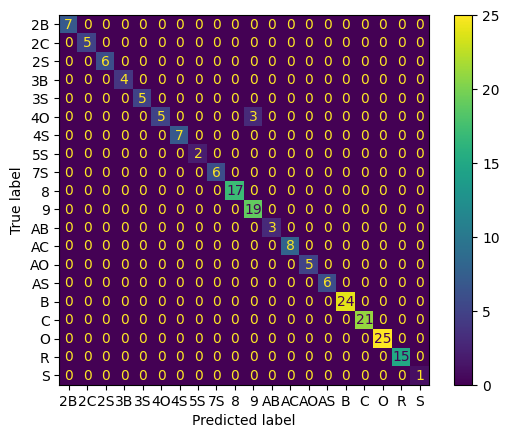

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=grid_svm.classes_)
disp.plot()